## Sales Analysis Project
By Pranav Prabhakar

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction
Hello, and welcome to my project. For this project, we are tasked with identifying trends in data in order to extrapolate and develop a program that targets boosting sales numbers. The dataset used consists of sales data from an Australian company called AAL and is divided into 6 categories: date, time, state, group, unit, and sales. By the end of this project, we should have enough information to draw actionable conclusions. 

# Data Wrangling
Our first step in data wrangling is to load the dataset. Here, we read the .csv file provided and display the first few rows in order to verify that we have loaded the correct data.

In [11]:
# Load the dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Display the first few rows
df.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


Next, we check if any cells return NA, indicating missing data. From here, we can categorize them as a percentage to see the impact that these missing columns have on the dataset in order to decide how to proceed. In this case we have no missing data, but we will proceed as if we do.

In [39]:
# Check for missing values and their percentage
missing_data = df.isna().sum().to_frame(name='Missing Values')
missing_data['Percentage'] = (missing_data['Missing Values'] / len(df)) * 100
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data



,Missing Values,Percentage


Now, we need a strategy to handle missing data. I have decided that if a column has more than 50% missing data, it makes sense to drop the column entirely, as filling it would not yield accurate results. The two else cases fill in the missing values with either the mode or median of the dataset, depending on if we are dealing with numbers or objects.

In [40]:
# Decide how to handle missing values
for column in missing_data.index:
    if missing_data.loc[column, 'Percentage'] > 50:
        # Drop columns with more than 50% missing data
        df = df.drop(columns=[column])
        print(f"Dropped column: {column}")
    elif df[column].dtype == 'object':
        # Fill missing categorical data with the mode
        df[column] = df[column].fillna(df[column].mode()[0])
        print(f"Filled missing values in column '{column}' with mode.")
    else:
        # Fill missing numerical data with the median
        df[column] = df[column].fillna(df[column].median())
        print(f"Filled missing values in column '{column}' with median.")


Now we check that there is no data left missing.

In [41]:
# Re-check for missing values to ensure all have been handled
missing_data_after = df.isna().sum().to_frame(name='Missing Values After')
missing_data_after['Percentage'] = (missing_data_after['Missing Values After'] / len(df)) * 100
missing_data_after = missing_data_after[missing_data_after['Missing Values After'] > 0]
missing_data_after


,Missing Values After,Percentage


# Data Analysis
Now that we have a clean dataset, it is time to work with what we have. The first step is to normalize the data. The goal of normalizing data is to create a standardized format for data throughout the table, making it easier to query and compare. We will display the first few rows of the normalized dataset.

In [13]:
# Normalize the Sales and Units columns
df_normalized = df.copy()
df_normalized['Sales'] = (df_normalized['Sales'] - df_normalized['Sales'].min()) / (df_normalized['Sales'].max() - df_normalized['Sales'].min())
df_normalized['Unit'] = (df_normalized['Unit'] - df_normalized['Unit'].min()) / (df_normalized['Unit'].max() - df_normalized['Unit'].min())

df_normalized.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


Now, we use the describe function to present the key figures of the normalized dataset.

In [14]:
# Descriptive statistics for Sales and Units
sales_stats = df_normalized['Sales'].describe()
units_stats = df_normalized['Unit'].describe()

sales_stats, units_stats


(count    7560.000000
 mean        0.254054
 std         0.204784
 min         0.000000
 25%         0.095238
 50%         0.190476
 75%         0.380952
 max         1.000000
 Name: Sales, dtype: float64,
 count    7560.000000
 mean        0.254054
 std         0.204784
 min         0.000000
 25%         0.095238
 50%         0.190476
 75%         0.380952
 max         1.000000
 Name: Unit, dtype: float64)

# Report Generation
Here, we can use the normalized data to identify the groups with the highest and lowest sales. We can see that Men purchase the most, while seniors purchase the least. This is also a good time to discuss the GroupBy() function in the context of data chunking or merging. For this specific project, using GroupBy() in a data chunking context is more beneficial, as our goal is to compare between groups.

In [15]:
# Identifying the group with the highest and lowest sales
group_sales = df_normalized.groupby('Group')['Sales'].sum().reset_index()
highest_sales_group = group_sales.loc[group_sales['Sales'].idxmax()]
lowest_sales_group = group_sales.loc[group_sales['Sales'].idxmin()]

highest_sales_group, lowest_sales_group


(Group           Men
 Sales    484.444444
 Name: 1, dtype: object,
 Group       Seniors
 Sales    473.571429
 Name: 2, dtype: object)

Now, we aim to pull summary statistics based on week, month, and quarter to generate these reports. We ensure that the date column is in a readable format, and we use the discussed GroupBy() function to group them together. Now we can cleanly display our table and immediately pull actionable insights. We can see that the 12th week sold the most, which corresponds with the highest selling month of December. This makes sense, as Christmas is a big shopping season.

In [16]:
# Convert the Date column to datetime format
df_normalized['Date'] = pd.to_datetime(df_normalized['Date'], format='%d-%b-%Y')

# Extract week, month, and quarter from the date
df_normalized['Week'] = df_normalized['Date'].dt.isocalendar().week
df_normalized['Month'] = df_normalized['Date'].dt.month
df_normalized['Quarter'] = df_normalized['Date'].dt.quarter

# Summarize sales by week
weekly_sales = df_normalized.groupby('Week')['Sales'].sum().reset_index()

# Summarize sales by month
monthly_sales = df_normalized.groupby('Month')['Sales'].sum().reset_index()

# Summarize sales by quarter
quarterly_sales = df_normalized.groupby('Quarter')['Sales'].sum().reset_index()

weekly_sales, monthly_sales, quarterly_sales


(    Week       Sales
 0     40   84.857143
 1     41  152.777778
 2     42  150.476190
 3     43  151.587302
 4     44  122.460317
 5     45  113.809524
 6     46  115.761905
 7     47  115.380952
 8     48  117.698413
 9     49  169.412698
 10    50  181.492063
 11    51  182.317460
 12    52  183.047619
 13    53   79.571429,
    Month       Sales
 0     10  645.650794
 1     11  495.761905
 2     12  779.238095,
    Quarter        Sales
 0        4  1920.650794)

# Data Visualization
Time to use our data to plot descriptive statistics. The first table is a state-wise sales analysis, comparing the states in Australia.  We can see that Victoria clearly outsold the rest of the states, even using a normalized dataset.

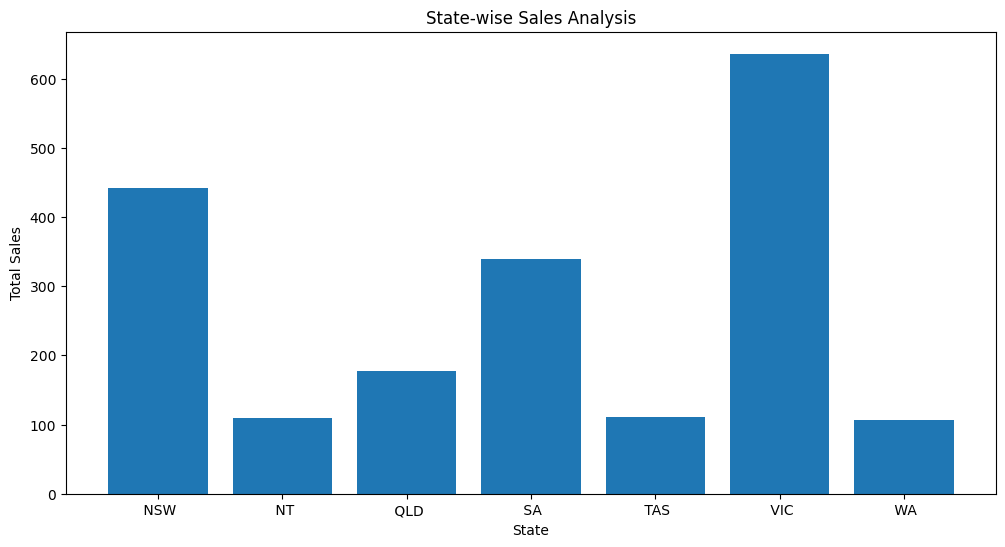

In [38]:
# Visualization: State-wise sales analysis
plt.figure(figsize=(12, 6))
plt.bar(df_normalized.groupby('State')['Sales'].sum().index, df_normalized.groupby('State')['Sales'].sum().values)
plt.title('State-wise Sales Analysis')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()


Next is a group-wise analysis, comparing the four groups across all states. We can see that the variance between groups is much lower, but as concluded earlier, men contribute to the most sales.

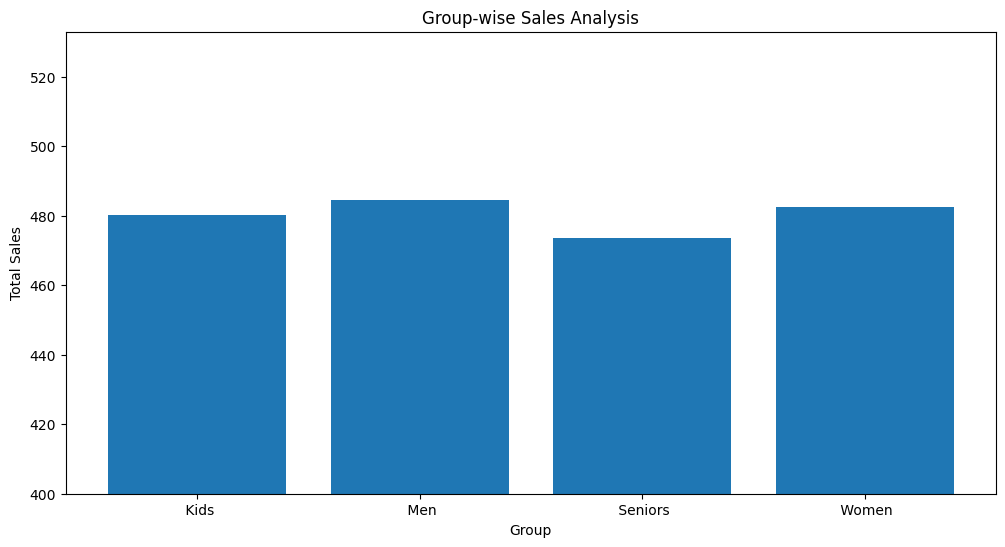

In [34]:
# Visualization: Group-wise sales analysis with adjusted y-axis limits
plt.figure(figsize=(12, 6))
plt.bar(group_sales['Group'], group_sales['Sales'])
plt.title('Group-wise Sales Analysis')
plt.xlabel('Group')
plt.ylabel('Total Sales')

# Adjust the y-axis limit
plt.ylim(400
         , group_sales['Sales'].max() * 1.1)  # Adding a 10% margin to the top
plt.show()


Now we have a weekly sales analysis. Although this wasn't requested, I thought it was interesting to see the week-to-week trend of sales.

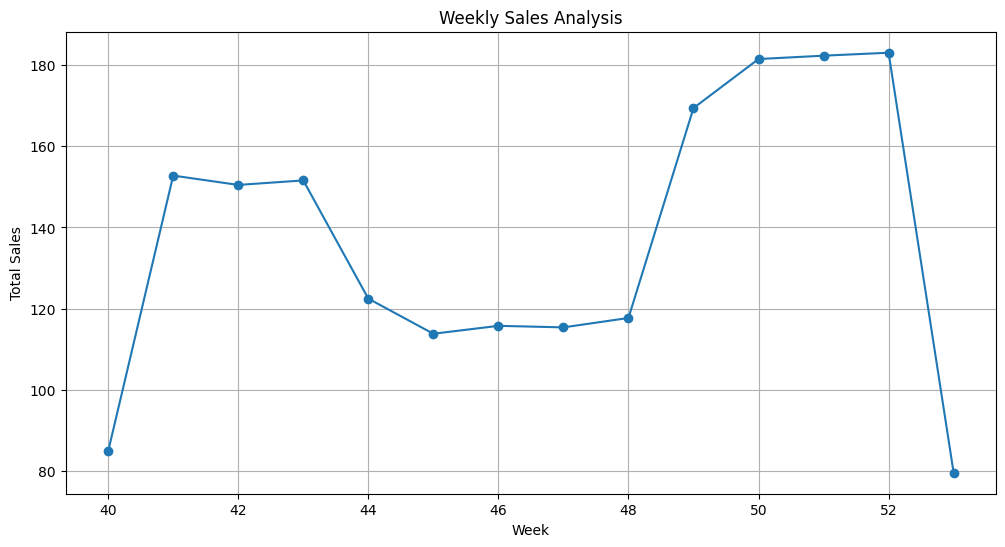

In [42]:
# Visualization: Weekly sales analysis
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Sales'], marker='o')
plt.title('Weekly Sales Analysis')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Similar to above, we can consolidate the weeks into months for easy viewing by the Sales and Marketing team. As concluded earlier, we can see that December is the most significant month.

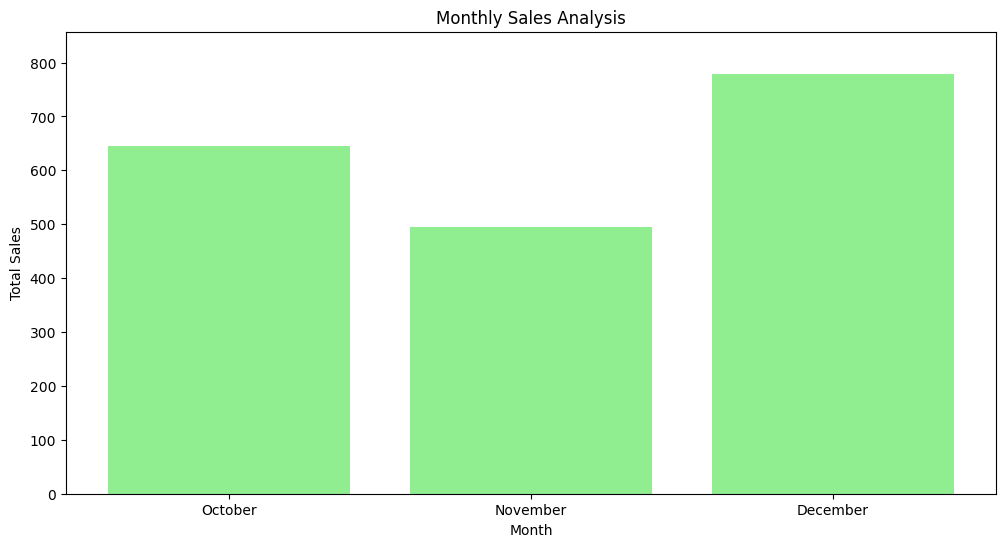

In [32]:
# Map month numbers to month names
month_names = {10: 'October', 11: 'November', 12: 'December'}
monthly_sales['Month'] = monthly_sales['Month'].map(month_names)

# Visualization: Monthly sales analysis with month names on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Sales'], color='lightgreen')
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Adjust the y-axis limit
plt.ylim(0, monthly_sales['Sales'].max() * 1.1)  # Adding a 10% margin to the top
plt.show()


Finally, we have a time-of-day analysis. This is important for business operations, as we can see peoples' shopping habits on a day-to-day basis. This will allow key staffing decisions, as well as targeted marketing campaigns. 

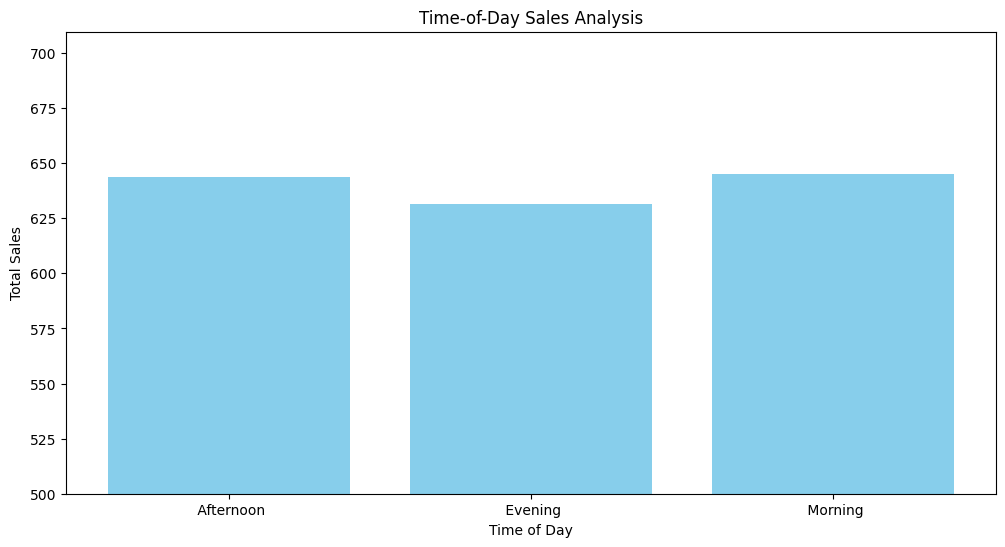

In [31]:
# Visualization: Time-of-Day sales analysis
time_of_day_sales = df_normalized.groupby('Time')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(time_of_day_sales['Time'], time_of_day_sales['Sales'], color='skyblue')
plt.title('Time-of-Day Sales Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')

# Adjust the y-axis limit
plt.ylim(500, time_of_day_sales['Sales'].max() * 1.1)  # Adding a 10% margin to the top
plt.show()


## Conclusion
There is a lot to conclude from the above reports. Firstly, I will break down my reasoning of this visualization package, then provide recommendations to the Sales and Marketing team.

I chose these graphs as I believe that bar charts are clear, concise, and easy to read. This allows for less confusion as these reports are presented between teams. My findings are as follows:

# Findings

1. Looking at the State-wise sales analysis, we can see that Victoria (VIC) records significantly more sales. However, a quick search will show that Victoria is only the second most popular state, with New South Wales (NSW) at the top and Queensland (QLD) not far behind. I recommend studying the success of the Victoria marketing program and applying similar concepts to other populated states.
2. Our weekly and monthly sales visualizations show that AAL experienced a drop-off in sales in November before the Christmas rush. However, October seems to be a good month regardless. I recommend launching a pre-Christmas campaign, where we offer Christmas items in November to aim for a smoother sales trajectory. This will capitalize on the holiday spirit early while not diminishing from the holiday season.
3. Finally, we can see in our time-of-day analysis that shopping drops during the evening. We can use this information to implement staffing changes to staff around demand. This should ideally save AAL payroll money, which ultimately leads to higher margins.

Thank you for your time. I hope you enjoyed this project by Pranav Prabhakar